In [1]:
from modularity_based import *
from spectral import *
from statistical import *

import igraph as ig 
import networkx as nx

%matplotlib inline

In [2]:
# Simple graph examples using igraph
ER = ig.Graph.Erdos_Renyi(n=100, p=0.5)
G1 = ig.Graph.Famous('Zachary')

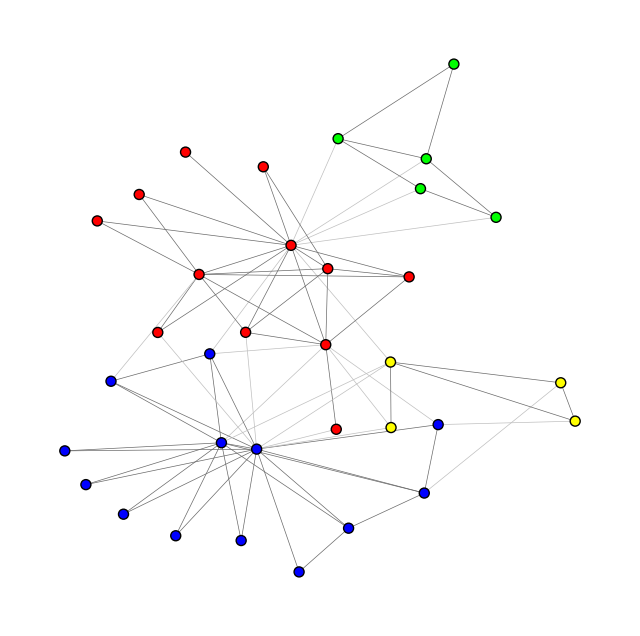

In [3]:
# Using only the igraph library
clusters_louv = louvain(G=G1, plot=True)

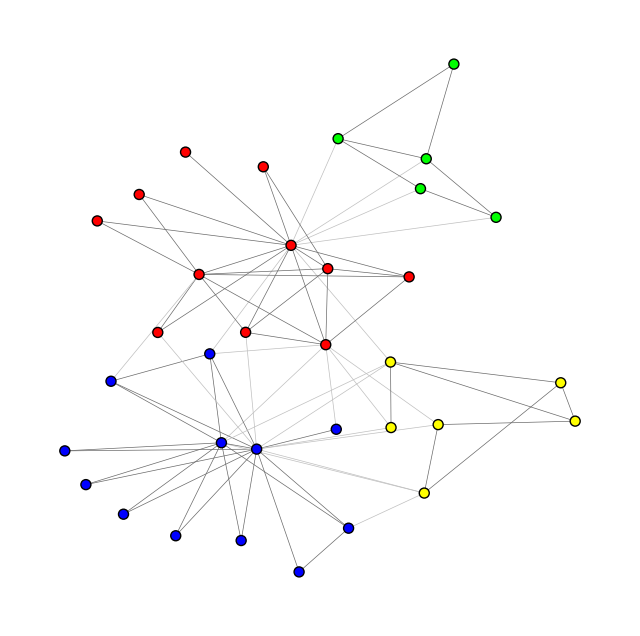

In [4]:
clusters_leid = leiden(G=G1, n=100, plot=True)

In [5]:
# Simple graph examples using networkx
G = nx.karate_club_graph() 

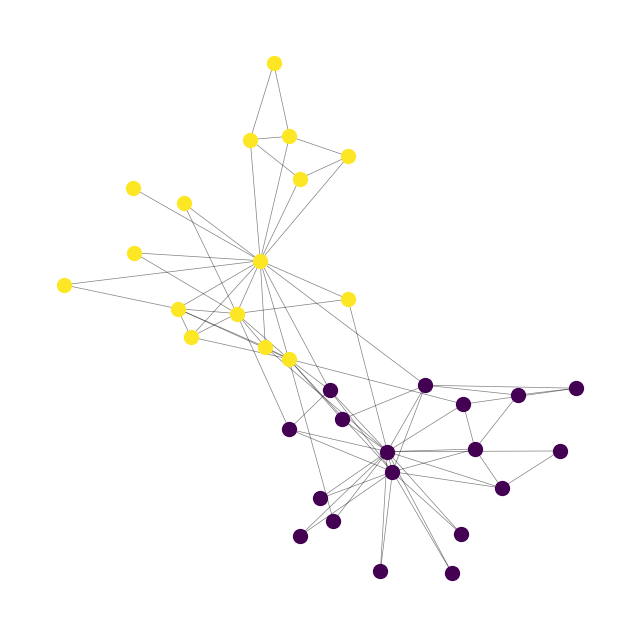

In [6]:
clusters_spec = spectral(G, 2, plot=True)

**--> Use CDlib to convert igraph object into networkx object and vice-versa**

--> Look more into CDlib for community-detection


In [7]:
## [OK] Implement Bayesian Inference
## [OK] Generate graph sbm fixer une des probas et varier l'autre pour comparer 
## adjusted_mutual_info_learn
## adjusted_rand_score
## matthews_corrcoefs

In [8]:
import graph_tool.all as gt

In [9]:
#G = gt.random_graph(100, lambda: 0.5, directed=False)
G = gt.collection.data["karate"]
clusters = bayesianInf(G)

Number of inferred clusters: 1


In [10]:
from graph_generation import *

In [11]:
sbm_graphs = sbm_generation(K=3, nb_probas=8)

In [12]:
from sklearn.metrics import adjusted_mutual_info_score

clusters_graphs = dict()
results = dict()  # Store the computed AMI scores

for key, graph in sbm_graphs.items():
    # Perform Bayesian inference
    clusters = bayesianInf(graph, seed=42)  # Extract clusters
    
    # Store the inferred clusters
    clusters_graphs[key] = clusters  # Use the string key, not the graph itself
    
    # Compute AMI score
    ind = adjusted_mutual_info_score(graph.vp["block"].a, clusters.a)
    results[key] = ind  # Store the score using the same key

# Print results
for key, score in results.items():
    print(f"{key}: Adjusted Mutual Information Score = {score:.4f}")


Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 3
Number of inferred clusters: 2
Number of inferred clusters: 3
Number of inferred clusters: 2
Number of inferred clusters: 2
SBM_out_0: Adjusted Mutual Information Score = 0.7339
SBM_out_1: Adjusted Mutual Information Score = 0.7339
SBM_out_2: Adjusted Mutual Information Score = 0.7339
SBM_out_3: Adjusted Mutual Information Score = 0.6804
SBM_out_4: Adjusted Mutual Information Score = 0.7339
SBM_out_5: Adjusted Mutual Information Score = 0.6885
SBM_out_6: Adjusted Mutual Information Score = 0.7339
SBM_out_7: Adjusted Mutual Information Score = 0.7339


In [13]:
from evaluation import compute_indexes, validation

In [14]:
ind, avg_ind = compute_indexes(index="adjusted_mutual_info_score", algorithm="bayesian", graphs = sbm_graphs)

Compute the score adjusted_mutual_info_score
Algorithm: bayesian
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 3
Number of inferred clusters: 2
Number of inferred clusters: 1
Number of inferred clusters: 3
Number of inferred clusters: 2

 Average score = 0.6289378337919544. 



In [15]:
results = validation(3, 8)

Compute the score adjusted_mutual_info_score
Algorithm: bayesian
Number of inferred clusters: 4
Number of inferred clusters: 3
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 3
Number of inferred clusters: 2
Number of inferred clusters: 3

 Average score = 0.7132168254091507. 

Compute the score adjusted_rand_score
Algorithm: bayesian
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 3
Number of inferred clusters: 3
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 3

 Average score = 0.5539704106015686. 

Compute the score matthews_corrcoef
Algorithm: bayesian
Number of inferred clusters: 1
Number of inferred clusters: 2
Number of inferred clusters: 2
Number of inferred clusters: 3
Number of inferred clusters: 2
Number of inferred clusters: 3
Number of inferred clusters: 3
Number of inferred clusters:

/Users/salyadiallo/anaconda3/envs/semproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/salyadiallo/anaconda3/envs/semproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/salyadiallo/anaconda3/envs/semproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/salyadiallo/anaconda3/envs/semproject/lib/python3.9/site-packages/sklearn/metrics/_classificatio


 Average score = 0.125. 

Compute the score adjusted_mutual_info_score
Algorithm: leiden


/Users/salyadiallo/anaconda3/envs/semproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/salyadiallo/anaconda3/envs/semproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/salyadiallo/anaconda3/envs/semproject/lib/python3.9/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



 Average score = 0.1943349798258739. 

Compute the score adjusted_rand_score
Algorithm: leiden

 Average score = 0.11146080554843377. 

Compute the score matthews_corrcoef
Algorithm: leiden

 Average score = 0.00981348745794024. 

Compute the score adjusted_mutual_info_score
Algorithm: louvain

 Average score = 0.19563980761724623. 

Compute the score adjusted_rand_score
Algorithm: louvain

 Average score = 0.11109534734369984. 

Compute the score matthews_corrcoef
Algorithm: louvain

 Average score = 0.014456821567903292. 



In [17]:
display(results)

,bayesian,spectral,leiden,louvain
adjusted_mutual_info_score,0.713217,1.0,0.194335,0.19564
adjusted_rand_score,0.55397,1.0,0.111461,0.111095
matthews_corrcoef,0.0,0.125,0.009813,0.014457
